## What is Bayes theorem

- In machine learning we are often interested in selecting the best hypothesis (h) given data (d).
- In a classification problem, our hypothesis (h) may be the class to assign for a new data instance (d).
- One of the easiest ways of selecting the most probable hypothesis given the data that we have that we can use as our prior knowledge about the problem. Bayes’ Theorem provides a way that we can calculate the probability of a hypothesis given our prior knowledge.
- Bayes’ Theorem is stated as:

                                        P(h|d) = (P(d|h) * P(h)) / P(d)


- Where

    P(h|d) is the probability of hypothesis h given the data d. This is called the posterior probability.
    P(d|h) is the probability of data d given that the hypothesis h was true.
    P(h) is the probability of hypothesis h being true (regardless of the data). This is called the prior probability of h.
    P(d) is the probability of the data (regardless of the hypothesis).
    You can see that we are interested in calculating the posterior probability of P(h|d) from the prior probability p(h) with P(D) and P(d|h).

- After calculating the posterior probability for a number of different hypotheses, you can select the hypothesis with the highest probability. This is the maximum probable hypothesis and may formally be called the maximum a posteriori (MAP) hypothesis.

- This can be written as:

                                                MAP(h) = max(P(h|d))

or

                                    MAP(h) = max((P(d|h) * P(h)) / P(d))

or

                                            MAP(h) = max(P(d|h) * P(h))

- The P(d) is a normalizing term which allows us to calculate the probability. We can drop it when we are interested in the most probable hypothesis as it is constant and only used to normalize.

- Back to classification, if we have an even number of instances in each class in our training data, then the probability of each class (e.g. P(h)) will be equal. Again, this would be a constant term in our equation and we could drop it so that we end up with:

                                                MAP(h) = max(P(d|h))

## Naive Bayes Classifier

- Naive Bayes is a classification algorithm (supervised learning) for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

- It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.

- This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

- It has two parts we cab say:
  - Class Probabilities: The probabilities of each class in the training dataset.
    - For example in a binary classification the probability of an instance belonging to class 1 would be calculated   as:

                        P(class=1) = count(class=1) / (count(class=0) + count(class=1))
  - Conditional Probabilities: The conditional probabilities of each input value given each class value.
    - For example, if a “weather” attribute had the values “sunny” and “rainy” and the class attribute had the class values “go-out” and “stay-home“, then the conditional probabilities of each weather value for each class value could be calculated as:

            P(weather=sunny|class=go-out) = count(instances with weather=sunny and class=go-out) / count(instances with class=go-out)
            P(weather=sunny|class=stay-home) = count(instances with weather=sunny and class=stay-home) / count(instances with class=stay-home)
            P(weather=rainy|class=go-out) = count(instances with weather=rainy and class=go-out) / count(instances with class=go-out)
            P(weather=rainy|class=stay-home) = count(instances with weather=rainy and class=stay-home) / count(instances with class=stay-home)

## Gaussian Naive Bayes
- Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution.This extension of naive Bayes is called Gaussian Naive Bayes.
- This is as simple as calculating the mean and standard deviation values of each input variable (x) for each class value.

                                            mean(x) = 1/n * sum(x)

- Where n is the number of instances and x are the values for an input variable in your training data.

                            standard deviation(x) = sqrt(1/n * sum(xi-mean(x)^2 ))



In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

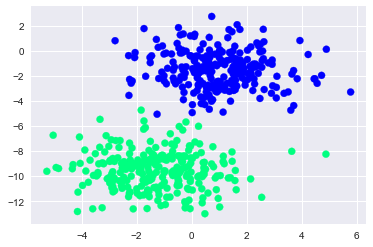

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(500, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter_r');

In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Lets generate new data

In [35]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

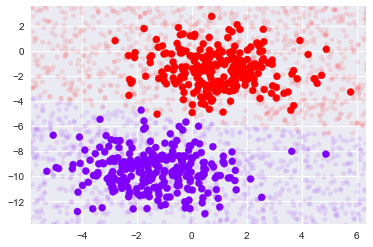

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap= 'rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='rainbow', alpha=0.1)
plt.axis(lim);

In [37]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(3)

array([[0.981, 0.019],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [0.996, 0.004]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.
Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Lets see how it works using the wine data

In [55]:
df=pd.read_csv('wine.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
df.columns = [  'name'
                ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(5)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
#Check for null values
df.isnull().sum()

name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

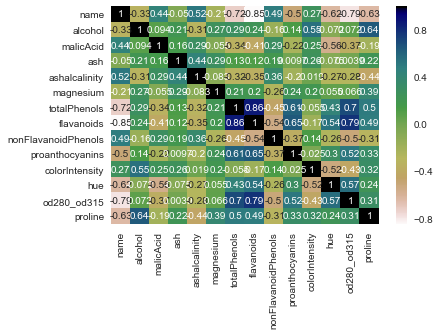

In [62]:
# find correlation of all columns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="gist_earth_r", annot = True)

In [66]:
# as ash column varibal ehas lowest correlation we can drop it
X= df.drop(['name','ash'], axis=1)

X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
Y=df.iloc[:,:1]
Y.head()

,name
0,1
1,1
2,1
3,1
4,1


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


In [79]:
# defines empty list because same data we will use as implement the other algorithms as well
models=[]
models.append(("Naive Bayes:",GaussianNB()))

In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print("Accuracy of a model" + names[i],results[i].mean()*100)

Accuracy of a modelNaive Bayes: 96.02564102564102


## Lets implement the Naive Bayes Classifier model with kaggle competition Titanice Disaster


In [81]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

# Importing dataset
data = pd.read_csv("train.csv")

# Convert categorical variable to numeric
data["Sex_cleaned"]=np.where(data["Sex"]=="male",0,1)
data["Embarked_cleaned"]=np.where(data["Embarked"]=="S",0,
                                  np.where(data["Embarked"]=="C",1,
                                           np.where(data["Embarked"]=="Q",2,3)
                                          )
                                 )
# Cleaning dataset of NaN
data=data[[
    "Survived",
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]].dropna(axis=0, how='any')

# Split dataset in training and test datasets
X_train, X_test = train_test_split(data, test_size=0.5, random_state=int(time.time()))


In [42]:
# Instantiate the classifier
gnb = GaussianNB()
used_features =[
    "Pclass",
    "Sex_cleaned",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked_cleaned"
]

# Train classifier
gnb.fit(
    X_train[used_features].values,
    X_train["Survived"]
)
y_pred = gnb.predict(X_test[used_features])

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))

Number of mislabeled points out of a total 357 points : 90, performance 74.79%


In [45]:
mean_survival=np.mean(X_train["Survived"])
mean_not_survival=1-mean_survival
print("Survival prob = {:03.2f}%, Not survival prob = {:03.2f}%"
      .format(100*mean_survival,100*mean_not_survival))

Survival prob = 40.06%, Not survival prob = 59.94%


In [46]:
mean_fare_survived = np.mean(X_train[X_train["Survived"]==1]["Fare"])
std_fare_survived = np.std(X_train[X_train["Survived"]==1]["Fare"])
mean_fare_not_survived = np.mean(X_train[X_train["Survived"]==0]["Fare"])
std_fare_not_survived = np.std(X_train[X_train["Survived"]==0]["Fare"])

print("mean_fare_survived = {:03.2f}".format(mean_fare_survived))
print("std_fare_survived = {:03.2f}".format(std_fare_survived))
print("mean_fare_not_survived = {:03.2f}".format(mean_fare_not_survived))
print("std_fare_not_survived = {:03.2f}".format(std_fare_not_survived))

mean_fare_survived = 50.02
std_fare_survived = 62.31
mean_fare_not_survived = 21.73
std_fare_not_survived = 32.63


In [48]:
gnb = GaussianNB()
used_features =["Fare"]
y_pred = gnb.fit(X_train[used_features].values, X_train["Survived"]).predict(X_test[used_features])
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["Survived"] != y_pred).sum(),
          100*(1-(X_test["Survived"] != y_pred).sum()/X_test.shape[0])
))
print("Std Fare not_survived {:05.2f}".format(np.sqrt(gnb.sigma_)[0][0]))
print("Std Fare survived: {:05.2f}".format(np.sqrt(gnb.sigma_)[1][0]))
print("Mean Fare not_survived {:05.2f}".format(gnb.theta_[0][0]))
print("Mean Fare survived: {:05.2f}".format(gnb.theta_[1][0]))

Number of mislabeled points out of a total 357 points : 125, performance 64.99%
Std Fare not_survived 32.63
Std Fare survived: 62.31
Mean Fare not_survived 21.73
Mean Fare survived: 50.02


## Pro and cons of Naive Bayes Classifiers
#### Pros:
- Computationally fast
- Simple to implement
- Works well with small datasets
- Works well with high dimensions
- Perform well even if the Naive Assumption is not perfectly met. In many cases, the approximation is enough to build a good classifier.

#### Cons:
- Require to remove correlated features because they are voted twice in the model and it can lead to over inflating importance.
- If a categorical variable has a category in test data set which was not observed in training data set, then the model will assign a zero probability. It will not be able to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation. Sklearn applies Laplace smoothing by default when you train a Naive Bayes classifier.